In [1]:
#Importing necessary libraries and dependencies
import numpy as np
from numpy.random import seed
seed(1)
import matplotlib.pyplot as plt
import pandas as pd
import string
import os
import shutil
import re

#tensorflow = library specializing in neural networks
import tensorflow as tf

#keras = python interface for neural networks
#runs on top of tensorflow (tensorflow is backend)
#more use friendly

from keras.models import Sequential
from keras.layers import SimpleRNN, Dense, Embedding
from tensorflow.keras.layers import TextVectorization
from keras.optimizers import Adam

from sklearn.linear_model import LinearRegression

In [2]:
#Generate training data

#generate sequence
sequence = np.array(list(range(10))).astype(float)

In [3]:
sequence

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

In [4]:
#number of training words
window_size = 3

In [5]:
#generate training data
train_data = [np.array(sequence[i:i+window_size]).reshape(1,-1) for i in range(sequence.shape[0]-window_size)]
train_data = np.concatenate(train_data*10, axis=0)
train_data = train_data.reshape(train_data.shape[0], train_data.shape[1], 1)

In [6]:
train_data.shape

(70, 3, 1)

In [7]:
train_data[:3]

array([[[0.],
        [1.],
        [2.]],

       [[1.],
        [2.],
        [3.]],

       [[2.],
        [3.],
        [4.]]])

In [8]:
#get training labels
train_label = [sequence[i+window_size] for i in range(sequence.shape[0]-window_size)]
train_label = np.concatenate([train_label]*10).reshape(-1,1)

In [9]:
##Train the model

#init model
model = Sequential()  

#RNN
model.add(SimpleRNN(1, activation='linear'))

#compile model
opt = Adam(learning_rate=1)
model.compile(loss='mean_squared_error', optimizer=opt, metrics=['mse'])

#train model
model.fit(train_data, train_label, epochs=100, verbose=1)

Epoch 1/100
3/3 [==============================] - 1s 21ms/step - loss: 127.9909 - mse: 127.9909
Epoch 2/100
3/3 [==============================] - 0s 12ms/step - loss: 60.3853 - mse: 60.3853
Epoch 3/100
3/3 [==============================] - 0s 12ms/step - loss: 3.8178 - mse: 3.8178
Epoch 4/100
3/3 [==============================] - 0s 11ms/step - loss: 3.5153 - mse: 3.5153
Epoch 5/100
3/3 [==============================] - 0s 11ms/step - loss: 2.9501 - mse: 2.9501
Epoch 6/100
3/3 [==============================] - 0s 11ms/step - loss: 2.1550 - mse: 2.1550
Epoch 7/100
3/3 [==============================] - 0s 13ms/step - loss: 2.4277 - mse: 2.4277
Epoch 8/100
3/3 [==============================] - 0s 12ms/step - loss: 4.7685 - mse: 4.7685
Epoch 9/100
3/3 [==============================] - 0s 12ms/step - loss: 4.6934 - mse: 4.6934
Epoch 10/100
3/3 [==============================] - 0s 10ms/step - loss: 4.3633 - mse: 4.3633
Epoch 11/100
3/3 [==============================] - 0s 13ms/ste

3/3 [==============================] - 0s 11ms/step - loss: 1.7422e-09 - mse: 1.7422e-09
Epoch 85/100
3/3 [==============================] - 0s 10ms/step - loss: 1.8580e-09 - mse: 1.8580e-09
Epoch 86/100
3/3 [==============================] - 0s 10ms/step - loss: 1.2655e-09 - mse: 1.2655e-09
Epoch 87/100
3/3 [==============================] - 0s 11ms/step - loss: 7.7347e-10 - mse: 7.7347e-10
Epoch 88/100
3/3 [==============================] - 0s 11ms/step - loss: 5.2377e-10 - mse: 5.2377e-10
Epoch 89/100
3/3 [==============================] - 0s 11ms/step - loss: 2.3704e-10 - mse: 2.3704e-10
Epoch 90/100
3/3 [==============================] - 0s 11ms/step - loss: 4.1749e-10 - mse: 4.1749e-10
Epoch 91/100
3/3 [==============================] - 0s 14ms/step - loss: 3.5232e-10 - mse: 3.5232e-10
Epoch 92/100
3/3 [==============================] - 0s 11ms/step - loss: 2.1099e-10 - mse: 2.1099e-10
Epoch 93/100
3/3 [==============================] - 0s 11ms/step - loss: 3.3711e-10 - mse: 3.37

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 1)                 3         
                                                                 
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [11]:
##Predict using the model , for known data
preds = model.predict(train_data).flatten()

3/3 [==============================] - 0s 4ms/step


In [12]:

#print some outputs
for i in range(len(preds[:3])):
    example = train_data[i].flatten()
    pred = preds[i]
    print(f'{example} -> {pred}')

[0. 1. 2.] -> 3.000002384185791
[1. 2. 3.] -> 3.999999523162842
[2. 3. 4.] -> 4.999997138977051


Text(0, 0.5, 'actual')

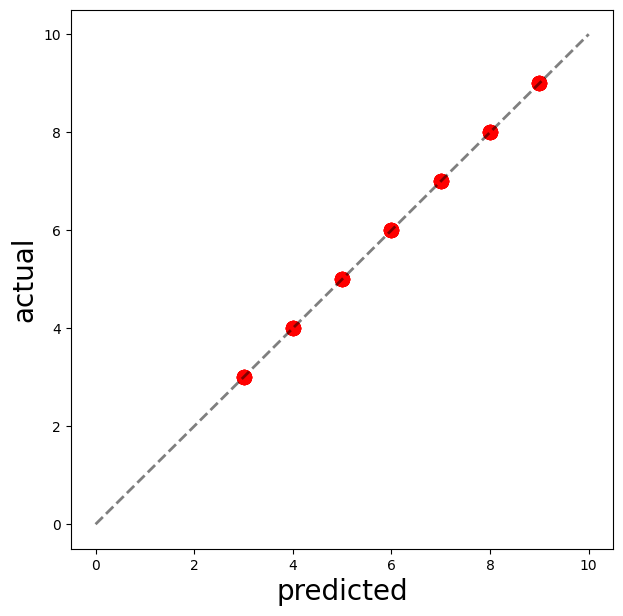

In [13]:
plt.figure(figsize=(7,7))
actuals = train_label.flatten()
plt.plot([0,10], [0,10], color='k', linestyle='--', alpha=0.5, linewidth=2)
plt.scatter(preds, actuals, s=100, color='r')
plt.xlabel('predicted', fontsize=20)
plt.ylabel('actual', fontsize=20)

In [14]:
## Predict using the model, on unknown data
out_of_sample_data = np.array([[6,7,8], [7,8,9], [8,9,10], [9,10,11], [10,11,12]]).reshape(5,3,1)

In [15]:
#make predictions using the model
preds = model.predict(out_of_sample_data).flatten()

1/1 [==============================] - 0s 198ms/step


In [16]:
#print some outputs
for i in range(len(preds)):
    example = out_of_sample_data[i].flatten()
    pred = preds[i]
    print(f'{example} -> {pred}')

[6 7 8] -> 8.999987602233887
[7 8 9] -> 9.999984741210938
[ 8  9 10] -> 10.999980926513672
[ 9 10 11] -> 11.999979019165039
[10 11 12] -> 12.999977111816406


In [17]:
#Behind the scenes:

#input vector weights in RNN (U)
model.weights[0].numpy()

array([[0.37590408]], dtype=float32)

In [18]:
#recurrent state weights in RNN (V)
model.weights[1].numpy()

array([[-1.8821167]], dtype=float32)

In [19]:
#bias term weights in RNN (b)
model.weights[2].numpy()

array([1.1110585], dtype=float32)

In [20]:
clf = LinearRegression()
clf.fit(train_data.reshape((train_data.shape[0], -1)), train_label.flatten())

LinearRegression()

In [21]:
#make predictions using the linear model
n = out_of_sample_data.shape[0]
preds = clf.predict(out_of_sample_data.reshape(n,-1)).flatten()

In [22]:
#print some outputs
for i in range(len(preds)):
    example = out_of_sample_data[i].flatten()
    pred = preds[i]
    print(f'{example} -> {pred}')

[6 7 8] -> 9.0
[7 8 9] -> 10.0
[ 8  9 10] -> 11.0
[ 9 10 11] -> 11.999999999999998
[10 11 12] -> 13.0


In [23]:
## A new example where the data is not so easily interpretable , it is in the form of a sigmoid

In [24]:
def sigmoid(v):
    return 1.0 / (1.0 + np.exp(-v))

In [25]:
sequence = np.sin(np.arange(0,6*3.14159,0.1))
sequence += np.random.normal(0,0.05,len(sequence))

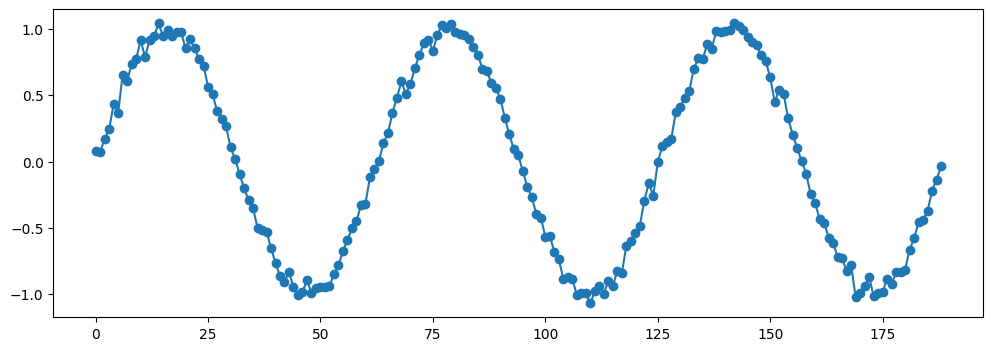

In [26]:
plt.figure(figsize=(12,4))
plt.plot(sequence)
plt.scatter(range(len(sequence)), sequence)

In [27]:
#generate training data
train_data = [np.array(sequence[i:i+window_size]).reshape(1,-1) for i in range(sequence.shape[0]-window_size)]
train_data = np.concatenate(train_data*10, axis=0)
train_data = train_data.reshape(train_data.shape[0], train_data.shape[1], 1)
train_data[:5]

array([[[0.08121727],
        [0.0692456 ],
        [0.17226074]],

       [[0.0692456 ],
        [0.17226074],
        [0.24187178]],

       [[0.17226074],
        [0.24187178],
        [0.43268872]],

       [[0.24187178],
        [0.43268872],
        [0.3643486 ]],

       [[0.43268872],
        [0.3643486 ],
        [0.65188306]]])

In [28]:
#get training labels
train_label = [sequence[i+window_size] for i in range(sequence.shape[0]-window_size)]
train_label = np.concatenate([train_label]*10).reshape(-1,1)

In [29]:
train_label[:5]

array([[0.24187178],
       [0.43268872],
       [0.3643486 ],
       [0.65188306],
       [0.60615734]])

In [30]:
#Let's try a linear model
clf = LinearRegression()
clf.fit(train_data.reshape((train_data.shape[0], -1)), train_label.flatten())

LinearRegression()

In [31]:
#make predictions using the linear model
preds = []
input_vec = train_data[-1].copy()
for _ in range(15):
    pred = clf.predict(input_vec.reshape(1,-1)).flatten()
    preds.append(pred[0])
    input_vec[0][-1] = pred[0]

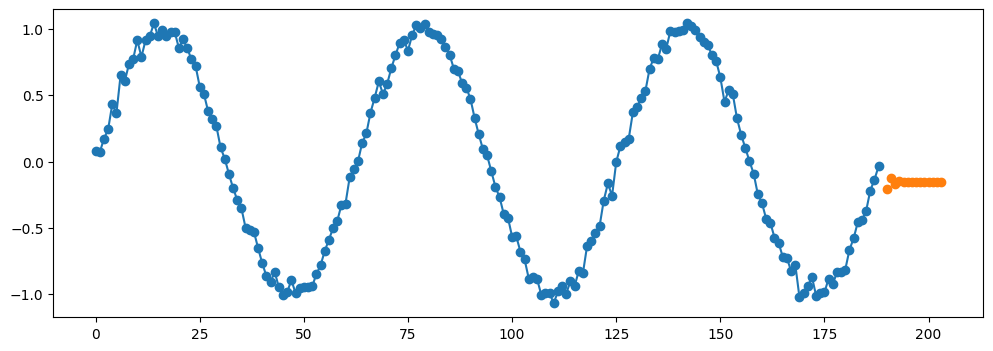

In [32]:
plt.figure(figsize=(12,4))
plt.plot(sequence)
plt.scatter(range(len(sequence)), sequence)
plt.scatter(range(len(sequence)+1, len(sequence)+15), preds[1:])

In [33]:
##Now let's train an RNN

#init model
model = Sequential()  

#RNN
model.add(SimpleRNN(2, activation='tanh'))

#Dense layer
model.add(Dense(1))

#compile model
opt = Adam(learning_rate=0.1)
model.compile(loss='mean_squared_error', optimizer=opt, metrics=['mse'])

#train model
model.fit(train_data, train_label, epochs=25, verbose=1)

Epoch 1/25
59/59 [==============================] - 2s 10ms/step - loss: 0.1966 - mse: 0.1966
Epoch 2/25
59/59 [==============================] - 1s 12ms/step - loss: 0.0099 - mse: 0.0099
Epoch 3/25
59/59 [==============================] - 1s 10ms/step - loss: 0.0081 - mse: 0.0081
Epoch 4/25
59/59 [==============================] - 1s 10ms/step - loss: 0.0077 - mse: 0.0077
Epoch 5/25
59/59 [==============================] - 1s 10ms/step - loss: 0.0077 - mse: 0.0077
Epoch 6/25
59/59 [==============================] - 1s 10ms/step - loss: 0.0071 - mse: 0.0071
Epoch 7/25
59/59 [==============================] - 1s 10ms/step - loss: 0.0077 - mse: 0.0077
Epoch 8/25
59/59 [==============================] - 1s 10ms/step - loss: 0.0076 - mse: 0.0076
Epoch 9/25
59/59 [==============================] - 1s 10ms/step - loss: 0.0075 - mse: 0.0075
Epoch 10/25
59/59 [==============================] - 1s 10ms/step - loss: 0.0077 - mse: 0.0077
Epoch 11/25
59/59 [==============================] - 1s 10m

In [34]:
#make predictions using the RNN model
preds = []
input_vec = train_data[-1:].copy()
for _ in range(15):
    pred = model.predict(input_vec).flatten()
    preds.append(pred[0])
    input_vec[0][-1] = pred[0]

1/1 [==============================] - 0s 20ms/step


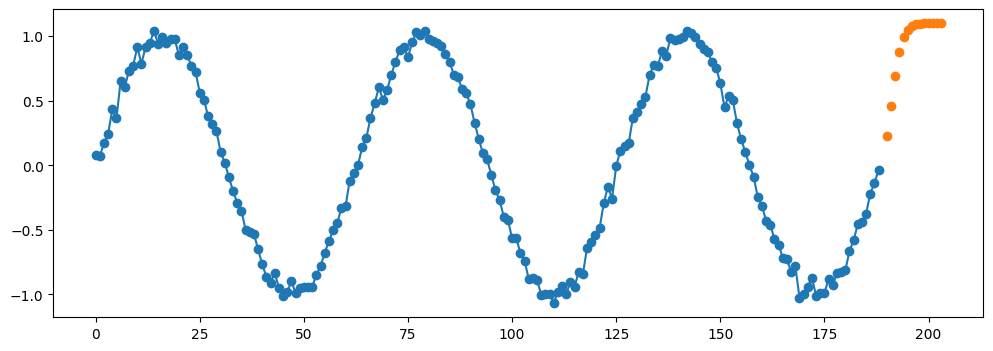

In [35]:
plt.figure(figsize=(12,4))
plt.plot(sequence)
plt.scatter(range(len(sequence)), sequence)
plt.scatter(range(len(sequence)+1, len(sequence)+15), preds[1:])

In [36]:
##Let's code up option sense - An NLP based Sentiment Analysis tool using RNN

In [44]:
#Load up some data
# url = "https://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz"

# dataset = tf.keras.utils.get_file("aclImdb", url,
#                                   untar=False, cache_dir='.',
#                                   cache_subdir='')

dataset_dir = "aclImdb"
os.listdir(dataset_dir)

['imdb.vocab', 'imdbEr.txt', 'README', 'test', 'train']

In [47]:
train_dir = os.path.join(dataset_dir, 'train')
os.listdir(train_dir)

['labeledBow.feat',
 'neg',
 'pos',
 'unsup',
 'unsupBow.feat',
 'urls_neg.txt',
 'urls_pos.txt',
 'urls_unsup.txt']

In [48]:
remove_dir = os.path.join(train_dir, 'unsup')
shutil.rmtree(remove_dir)

In [49]:
batch_size = 512
seed = 123
train_ds = tf.keras.utils.text_dataset_from_directory(
    'aclImdb/train', batch_size=batch_size, validation_split=0.2,
    subset='training', seed=seed)
val_ds = tf.keras.utils.text_dataset_from_directory(
    'aclImdb/train', batch_size=batch_size, validation_split=0.2,
    subset='validation', seed=seed)

Found 25000 files belonging to 2 classes.
Using 20000 files for training.
Found 25000 files belonging to 2 classes.
Using 5000 files for validation.


In [51]:
for text_batch, label_batch in train_ds.take(1):
    for i in range(5):
        print(label_batch[i].numpy(), text_batch.numpy()[i])
        print()

0 b"Wow. Some movies just leave me speechless. This was undeniably one of those movies. When I left the theatre, not a single word came to my mouth. All I had was an incredible urge to slam my head against the theatre wall to help me forget about the last hour and a half. Unfortunately, it didn't work. Honestly, this movie has nothing to recommend. The humor was at the first grade level, at best, the acting was overly silly, and the plot was astronomically far-fetched. I hearby pledge never to see an other movie starring Chris Kattan or any other cast-member of SNL."

1 b'This is one of the great movies of the 80s in MY collection that I think about all the time. <br /><br />The Running Man is one of Arnold`s best and most different films even to this day and when I first saw The Running Man I was so excited to see a movie like this. I just adore all of the fights and this is truly a special movie. It also has Jesse Ventura, the legendary Professor Toru Tanaka, Sven-Ole Thorsen, the be

In [52]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [53]:
# Create a custom standardization function to strip HTML break tags ''.
def custom_standardization(input_data):
    lowercase = tf.strings.lower(input_data)
    stripped_html = tf.strings.regex_replace(lowercase, '<br />', ' ')  # Target specific HTML break tag
    return tf.strings.regex_replace(stripped_html, '[%s]' % re.escape(string.punctuation), '')


# Vocabulary size and number of words in a sequence.
vocab_size = 10000
sequence_length = 100

# Use the text vectorization layer to normalize, split, and map strings to
# integers. Note that the layer uses the custom standardization defined above.
# Set maximum_sequence length as all samples are not of the same length.
vectorize_layer = TextVectorization(
    standardize=custom_standardization,
    max_tokens=vocab_size,
    output_mode='int',
    output_sequence_length=sequence_length)

# Make a text-only dataset (no labels) and call adapt to build the vocabulary.
text_ds = train_ds.map(lambda x, y: x)
vectorize_layer.adapt(text_ds)

In [54]:
embedding_dim=20

model = Sequential([
    vectorize_layer,
    Embedding(vocab_size, embedding_dim, name="embedding"),
    SimpleRNN(8),
    Dense(1, activation='sigmoid')
])

In [55]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [56]:
model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=20
)

Epoch 1/20


C:\Users\madhu\anaconda3\envs\cuda_test\lib\site-packages\keras\backend.py:5673: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


40/40 [==============================] - 18s 411ms/step - loss: 0.6937 - accuracy: 0.5055 - val_loss: 0.6925 - val_accuracy: 0.5166
Epoch 2/20
40/40 [==============================] - 12s 310ms/step - loss: 0.6742 - accuracy: 0.6370 - val_loss: 0.6920 - val_accuracy: 0.5268
Epoch 3/20
40/40 [==============================] - 12s 305ms/step - loss: 0.6308 - accuracy: 0.7395 - val_loss: 0.6903 - val_accuracy: 0.5388
Epoch 4/20
40/40 [==============================] - 12s 299ms/step - loss: 0.5731 - accuracy: 0.8063 - val_loss: 0.6942 - val_accuracy: 0.5446
Epoch 5/20
40/40 [==============================] - 12s 307ms/step - loss: 0.5406 - accuracy: 0.8060 - val_loss: 0.6839 - val_accuracy: 0.5770
Epoch 6/20
40/40 [==============================] - 13s 321ms/step - loss: 0.5074 - accuracy: 0.8193 - val_loss: 0.7004 - val_accuracy: 0.5538
Epoch 7/20
40/40 [==============================] - 13s 317ms/step - loss: 0.4534 - accuracy: 0.8595 - val_loss: 0.7179 - val_accuracy: 0.5452
Epoch 8/20

In [ ]:
while True:
    curr_input = input()
    if curr_input == 'quit':
        break
    pred = model.predict([[curr_input]], verbose=False)[0][0]
    print(pred)
    print()

I love this movie
0.35205507

Despite some negative comments this film has garnered in the IMDb pages, it\'s still worth a look as this is a story about survival and camaraderie between two different men with different mentalities while in a difficult mission in the Panamanian jungle.<br /><br />Peruvian director Luis Llosa takes us along to watch this thriller set in Panama. The film has some good moments as Beckett, the veteran marine, takes a newly arrived man, recently sent to try to eliminate a notorious drug cartel head and the corrupt army general who might be the next president of the country. The only problem, Miller, has no experience in what he has been entrusted to achieve.<br /><br />Miller, the arrogant newly arrived man to the jungle and to the guerrilla warfare between the military and drug lords against the infiltrated American intelligence men, learns a valuable lesson from Beckett. What looks good in theory, is irrelevant in the jungle.<br /><br />Tom Berenger, is an

In [ ]:
model.save('sentiment_analysis.h5')
print("Model saved successfully!")